writing my own code (COPY-PASTE NOT ALLOWED) for cs231n's [classification notes](https://cs231n.github.io/classification/)

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import time
import os

In [10]:
path = '../data/cifar-10-batches-py'
train = !ls $path | grep data
test = !ls $path | grep test

In [11]:
def load_file(fn):
    with open(fn, 'rb') as f:
        data = pickle.load(f, encoding='bytes')
    return data

In [12]:
def load_batch(batch_id):
    return load_file(os.path.join(path, batch_id))

In [13]:
dicts_train = [load_batch(train_file) for train_file in train]
dicts_test = [load_batch(test_file) for test_file in test]
X_train_l, Y_train_l = zip(*[(d[b'data'], d[b'labels']) for d in dicts_train])
X_test_l, Y_test_l = zip(*[(d[b'data'], d[b'labels']) for d in dicts_test])
def concat(data_l): return np.concatenate([data for data in data_l], axis=0)
X_train, Y_train, X_test, Y_test = map(concat, [X_train_l, Y_train_l, X_test_l, Y_test_l])

In [217]:
batches_meta = load_batch('batches.meta')
label_names = batches_meta[b'label_names']

In [247]:
class Classifier:
    def __init__(self, X, Y):
        self.X = X
        self.Y = Y

    def l1(self, a, b):
        return np.abs(a - b).sum()
        
    def get_nearest(self, x_0, k=10):
        dist = [self.l1(x, x_0) for x in self.X]
        idxs = np.arange(self.X.shape[0])
        _, sort_idx = zip(*sorted(zip(dist, idxs)))
        return np.array(sort_idx)[:k]

    def show_closest(self, x_0, k=10):
        for idx in self.get_nearest(x_0, k):
            plt.figure()
            plt.imshow(X_train[idx].reshape(3, 32, 32).T)

    def predict(self, x_0, k=10):
        return np.argmax(np.bincount(self.Y[self.get_nearest(x_0, k)]))

    def name(self, x_0, k=10):
        return label_names[self.predict_class(x_0, k)]

In [248]:
clf = Classifier(X_train, Y_train)

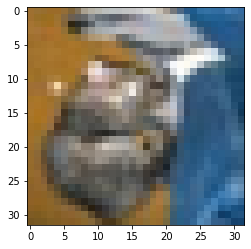

In [249]:
# Sample
plt.imshow(X_test[0].reshape(3, 32, 32).T)

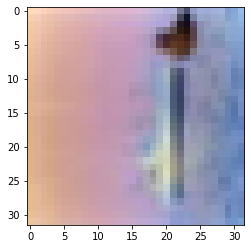

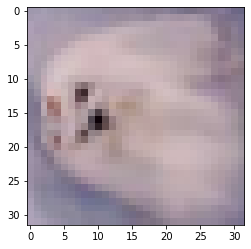

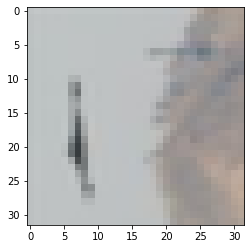

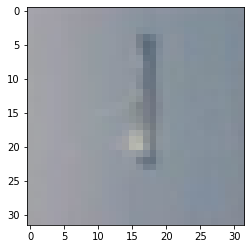

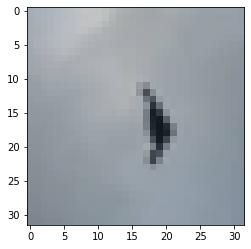

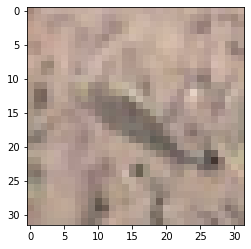

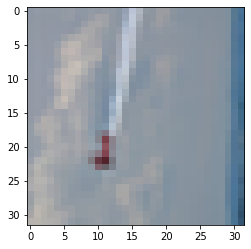

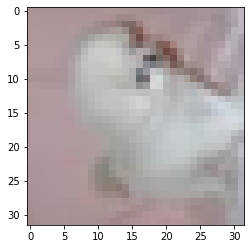

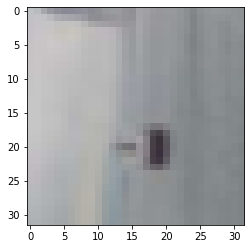

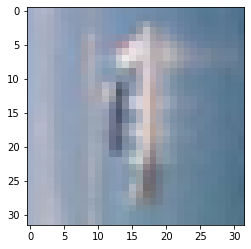

In [250]:
# 10 closest in train set
clf.show_closest(X_test[0])

In [260]:
def get_accuracy(clf, X_eval, Y_eval, k=10):
    return np.sum([clf.predict(x, k) == y for (x, y) in zip(X_eval, Y_eval)]) / X_eval.shape[0]

In [267]:
start = time.time()
n_ex = 100
acc = get_accuracy(clf, X_test[:n_ex], Y_test[:n_ex])
print(f"for {n_ex} examples, accuracy is {100 * acc}% (took {time.time()-start:.2f}s for {n_ex})")

for 100 examples, accuracy is 27.0% (took 88.55s for 100)
